In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

# load data
data should be a single folder. Inside there should be a 'angles' (with angles), 'pose-3d', and 'tdt' folders named exactly that

In [2]:
session512 = CortProcessor('/home/diya/ubuntu/rat-fes/data/5-10') #insert name of your folder here

read from t=0s to t=174.56s
read from t=0s to t=154.21s
read from t=0s to t=183.1s
read from t=0s to t=233.63s


# process data
here, we crop our data, turn our raw data into rates, and we resample our angles to be same times as binned spikes

In [3]:
crop512 = [(12,160),(10,155), (9, 210), (12, 230)]


In [ ]:
rates, angles = session512.process(crop512, threshold_multiplier=3.0)

In [6]:
print(rates.shape, angles.shape) #here's our cropped rates, angles

(11308, 32) (11308, 7)


In [7]:
print(session510.format_rate.shape, session510.format_angle.shape) #formatted  rates/angles for use in a wiener filter with 10 lags is stored as an instance variable as well

(11268, 320) (11268, 7)


# lets do some other processing, like getting toe height!

In [20]:
session512.toe_height_list[1].shape

(2402,)

In [19]:
session512.rate_list[1].shape

(2402, 32)

In [30]:
toe_height = session512.process_toe_height()

# or dividing into gaits, then plotting sorted raster.

In [37]:
session512.get_gait_indices()

In [40]:
X_gait, nada = session512.divide_into_gaits(rates, angles)
sorted_neurons = session512.neuron_tuning(X_gait)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
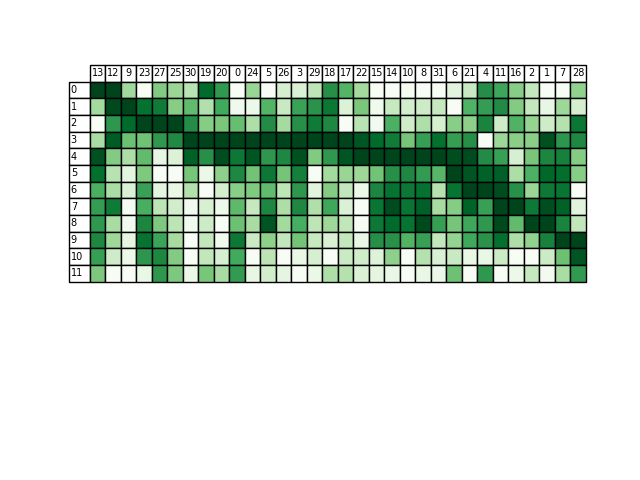

In [42]:
plot_raster(sorted_neurons)

# and now some decoding

In [ ]:
h_angles, vaf_angles, best_x_angles, best_y_angles = session512.decode_angles()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
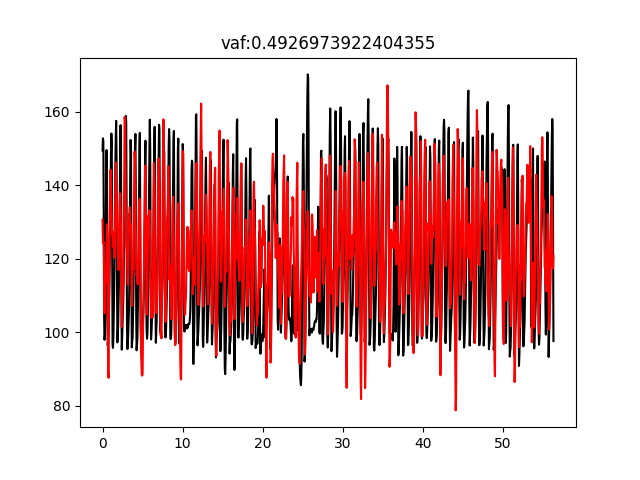

In [34]:
plot_wiener_filter_predic(best_x_angles, best_y_angles[:,3], h_angles[:,3])

In [35]:
h_toe, vaf_toe, best_x_toe, best_y_toe = session512.decode_toe_height()

[0.16648912 0.21544184 0.2970867  0.35306129 0.38050074 0.49618332
 0.36758492 0.4071439  0.42079587 0.45054131]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
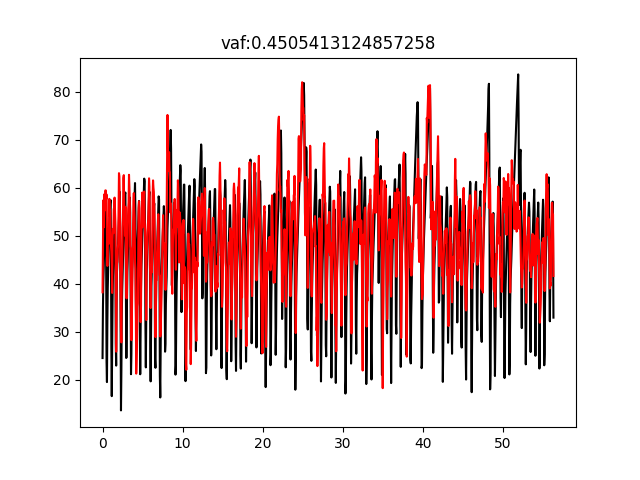

In [36]:
plot_wiener_filter_predic(best_x_toe, best_y_toe, h_toe)